In [1]:
DATASET_NAME = "playground-series-s4e12"

In [2]:
import os
def is_kaggle_environment():
    return os.path.exists("/kaggle")
if not is_kaggle_environment():
    DATASET_PATH = f"./kaggle/input/{DATASET_NAME}"
else:
    DATASET_PATH = f"/kaggle/input/{DATASET_NAME}"

### Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv(f"{DATASET_PATH}/train.csv")
test = pd.read_csv(f"{DATASET_PATH}/test.csv")

### EDA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [6]:
def calculate_missing_percentage(data : pd.DataFrame):
    """
    Calculate the percentage of missing values for each column in the dataset.
    """
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    return missing_percentage.round(2)

def plot_missing_percentage(missing_percentage, title="Percentage of Missing Values by Column"):
    """
    Plot the percentage of missing values for each column as a horizontal bar chart.
    """
    missing_percentage.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor="black", linewidth=1.0)
    plt.title(title)
    plt.xlabel('Percentage')
    plt.ylabel('Columns')
    plt.show()

def plot_missing_heatmap(data : pd.DataFrame, title="Heatmap of Missing Values"):
    """
    Create a heatmap visualization of missing values in the dataset.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.show()

In [7]:
# Compart missing values in train and test datasets
missing_values = pd.DataFrame()
missing_values['train'] = calculate_missing_percentage(train)
missing_values['test'] = calculate_missing_percentage(test)
# Percentage difference between train and test dataset missing values
missing_values['avg'] = (missing_values['train'] + missing_values['test']) / 2
missing_values['diff'] = (missing_values['train'] - missing_values['test']).abs()
missing_values = missing_values.sort_values(by='avg', ascending=False)

In [8]:
missing_values

,train,test,avg,diff
Previous Claims,30.34,30.35,30.345,0.01
Occupation,29.84,29.89,29.865,0.05
Credit Score,11.49,11.43,11.460,0.06
Number of Dependents,9.14,9.14,9.140,0.00
Customer Feedback,6.49,6.53,6.510,0.04
Health Score,6.17,6.18,6.175,0.01
Annual Income,3.75,3.73,3.740,0.02
Age,1.56,1.56,1.560,0.00
Marital Status,1.54,1.54,1.540,0.00
id,0.00,0.00,0.000,0.00


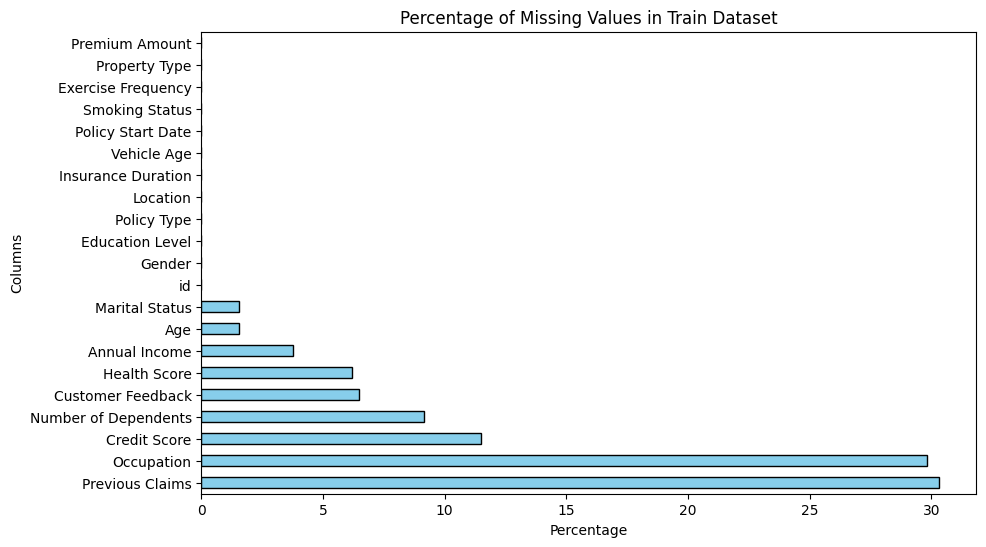

In [9]:
plot_missing_percentage(missing_values['train'], title="Percentage of Missing Values in Train Dataset")

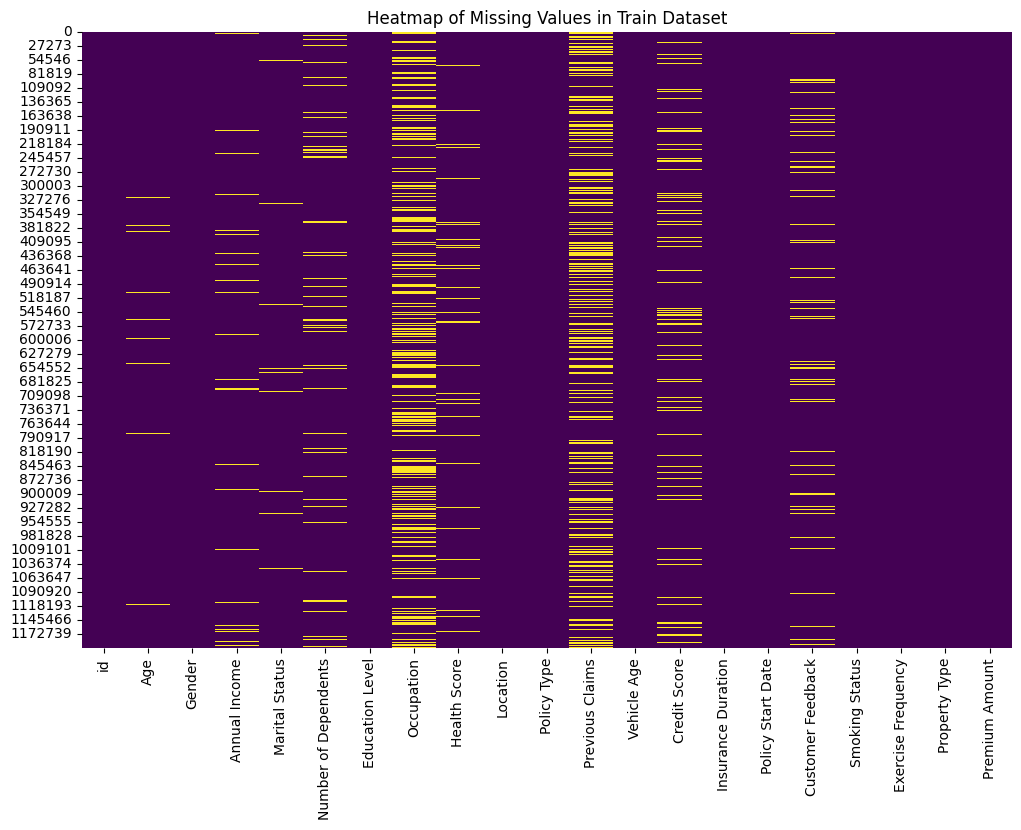

In [10]:
plot_missing_heatmap(train, title="Heatmap of Missing Values in Train Dataset")

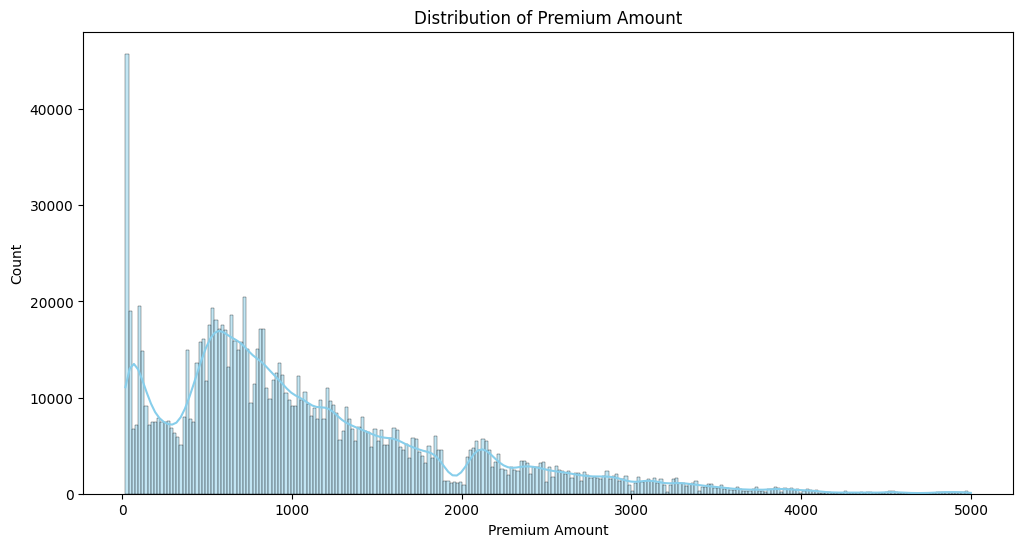

In [11]:
# Histogram of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(train['Premium Amount'], kde=True, color='skyblue')
plt.title('Distribution of Premium Amount')
plt.show()

In [12]:
train['Policy Start Year'] = pd.to_datetime(train['Policy Start Date']).dt.year
train['Policy Start Month'] = pd.to_datetime(train['Policy Start Date']).dt.month
train['Policy Start Day'] = pd.to_datetime(train['Policy Start Date']).dt.day
train['Policy Start dow'] = pd.to_datetime(train['Policy Start Date']).dt.dayofweek

In [13]:
test['Policy Start Year'] = pd.to_datetime(test['Policy Start Date']).dt.year
test['Policy Start Month'] = pd.to_datetime(test['Policy Start Date']).dt.month
test['Policy Start Day'] = pd.to_datetime(test['Policy Start Date']).dt.day
test['Policy Start dow'] = pd.to_datetime(test['Policy Start Date']).dt.dayofweek

In [14]:
# Histograms of the numerical features
numerical_features = [col for col in train.columns if train[col].dtype != 'object' and col not in ["id"]]

In [15]:
numerical_features

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Premium Amount',
 'Policy Start Year',
 'Policy Start Month',
 'Policy Start Day',
 'Policy Start dow']

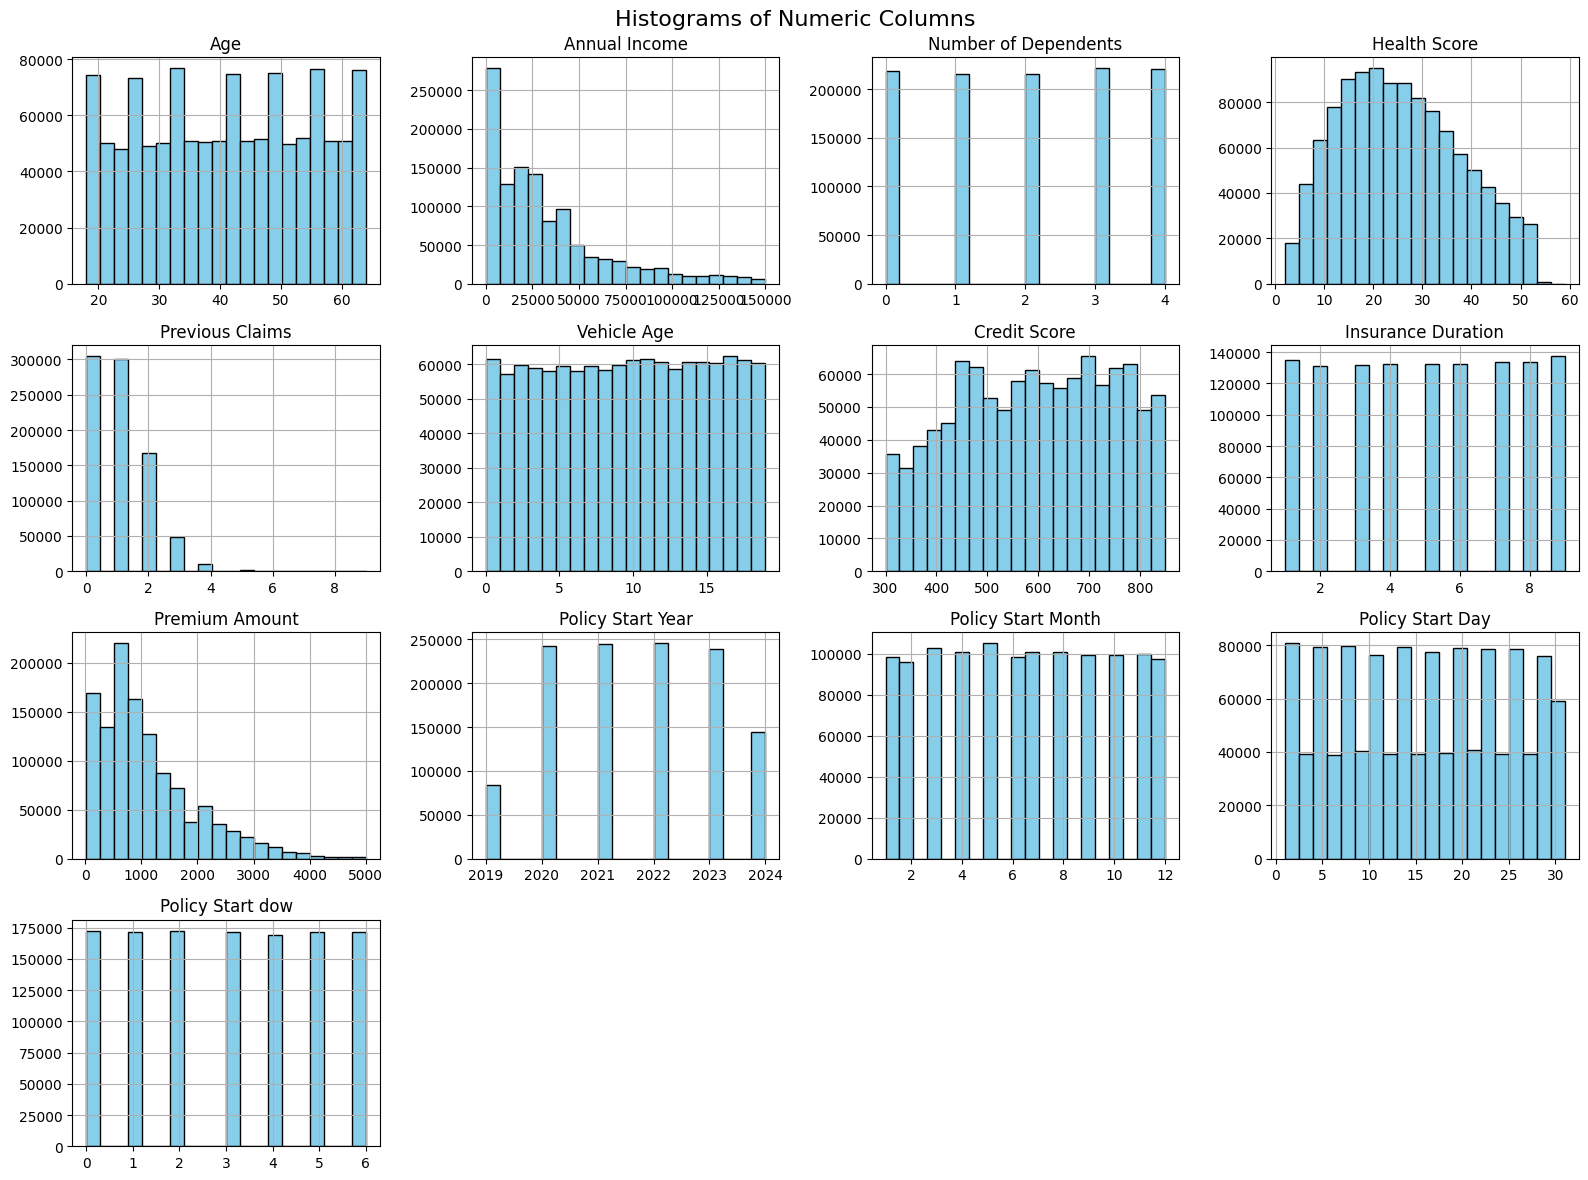

In [16]:
train[numerical_features].hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()  # Adjust layout for the title
plt.show()

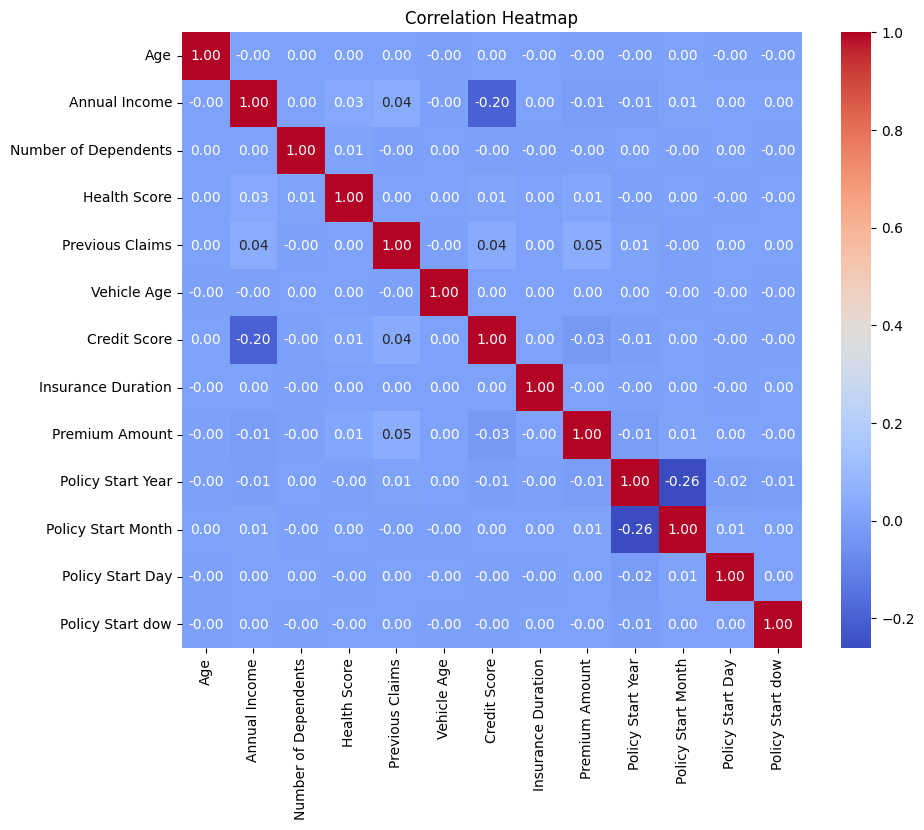

In [17]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = train[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### Feature Engineering

In [18]:
train['y'] = np.log1p(train['Premium Amount']).astype(np.float32)

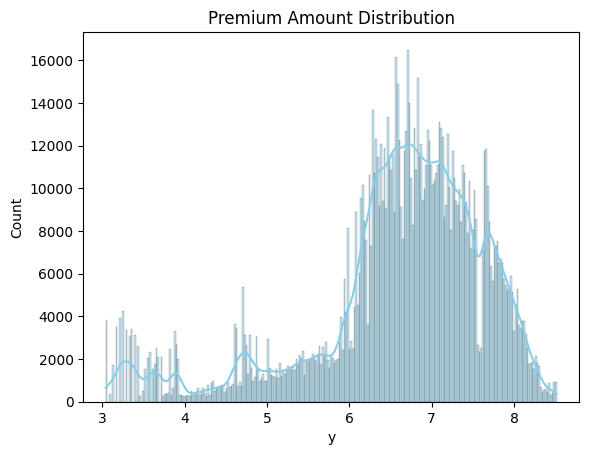

In [19]:
sns.histplot(train['y'], kde=True, color='skyblue')
plt.title('Premium Amount Distribution')
plt.show()

In [20]:
RMV = ["id", "Policy Start Date", "Premium Amount", "y"]

In [21]:
FEATURES = [col for col in train.columns if col not in RMV]
print(f"THE {len(FEATURES)} BASIC FEATURES ARE:")
combined = pd.concat([train, test], axis=0, ignore_index=True)
CATS = []
HIGH_CARDINALITY = []
for c in FEATURES:
    ftype = "numerical"
    if combined[c].dtype=="object":
        CATS.append(c)
        combined[c] = combined[c].fillna("NAN")
        combined[c],_ = combined[c].factorize()
        combined[c] -= combined[c].min()
        ftype = "categorical"
    if combined[c].dtype=="int64":
        combined[c] = combined[c].astype("int32")
    elif combined[c].dtype=="float64":
        combined[c] = combined[c].astype("float32")
        
    n = combined[c].nunique()
    print(f"{c} ({ftype}) with {n} unique values")
    if n>=9: 
        HIGH_CARDINALITY.append(c)

print("\nTHE FOLLOWING HAVE 9 OR MORE UNIQUE VALUES:", HIGH_CARDINALITY )

THE 22 BASIC FEATURES ARE:
Age (numerical) with 47 unique values
Gender (categorical) with 2 unique values
Annual Income (numerical) with 97540 unique values
Marital Status (categorical) with 4 unique values
Number of Dependents (numerical) with 5 unique values
Education Level (categorical) with 4 unique values
Occupation (categorical) with 4 unique values
Health Score (numerical) with 640260 unique values
Location (categorical) with 3 unique values
Policy Type (categorical) with 3 unique values
Previous Claims (numerical) with 10 unique values
Vehicle Age (numerical) with 20 unique values
Credit Score (numerical) with 550 unique values
Insurance Duration (numerical) with 9 unique values
Customer Feedback (categorical) with 4 unique values
Smoking Status (categorical) with 2 unique values
Exercise Frequency (categorical) with 4 unique values
Property Type (categorical) with 3 unique values
Policy Start Year (numerical) with 6 unique values
Policy Start Month (numerical) with 12 unique 

In [22]:
train = combined.iloc[:len(train)].copy()
test = combined.iloc[len(train):].reset_index(drop=True).copy()

In [37]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import root_mean_squared_log_error

print("Using XGBoost version",xgb.__version__)

Using XGBoost version 2.1.3


In [38]:
len(train), len(test)

(1200000, 800000)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train[FEATURES], train['y'], test_size=0.2, random_state=0)

model = XGBRegressor(
    max_depth=8, 
    colsample_bytree=0.9, 
    subsample=0.9, 
    n_estimators=2_000, 
    learning_rate=0.01, 
    early_stopping_rounds=25,  
    eval_metric="rmse",
)

model.fit(
    x_train, y_train,
    eval_set=[(x_valid, y_valid)],   
    verbose=100
)

[0]	validation_0-rmse:1.09674
[100]	validation_0-rmse:1.05898
[200]	validation_0-rmse:1.05060
[300]	validation_0-rmse:1.04831
[400]	validation_0-rmse:1.04767
[500]	validation_0-rmse:1.04749
[600]	validation_0-rmse:1.04743
[621]	validation_0-rmse:1.04743


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=25,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
pred_logs = model.predict(test[FEATURES])

preds = np.expm1(pred_logs)

In [43]:
submission = pd.DataFrame({'id': test['id'], 'Premium Amount': preds})
submission.head()

,id,Premium Amount
0,1200000,837.443604
1,1200001,826.058167
2,1200002,803.731628
3,1200003,797.500000
4,1200004,755.819763


In [45]:
# Calculate RMSLE for whole training set
m = model.predict(train[FEATURES])
preds = np.expm1(m)

root_mean_squared_log_error(y_true=train['Premium Amount'], y_pred=preds)

1.0366645742136678